In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Question2:  predict the probability of Heart Disease 

In [2]:
df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
df[0:10]

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
5,56,120,236,0,178,0.8,No
6,62,140,268,2,160,3.6,Yes
7,57,120,354,0,163,0.6,No
8,63,130,254,2,147,1.4,Yes
9,53,140,203,2,155,3.1,Yes


In [3]:
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

X = df[feature_cols]

y = df['AHD']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [5]:
my_logreg = LogisticRegression()


In [6]:
my_logreg.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']


In [8]:
score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)

0.7183098591549296


In [9]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)
print(y_predict_prob_lr)

[[0.44554355 0.55445645]
 [0.57553253 0.42446747]
 [0.42859898 0.57140102]
 [0.40443735 0.59556265]
 [0.85994725 0.14005275]
 [0.77042239 0.22957761]
 [0.7363589  0.2636411 ]
 [0.88730801 0.11269199]
 [0.34746689 0.65253311]
 [0.68753296 0.31246704]
 [0.10853452 0.89146548]
 [0.92042527 0.07957473]
 [0.32305118 0.67694882]
 [0.46512838 0.53487162]
 [0.68364107 0.31635893]
 [0.86489899 0.13510101]
 [0.0965789  0.9034211 ]
 [0.6468058  0.3531942 ]
 [0.12662886 0.87337114]
 [0.36732841 0.63267159]
 [0.85060173 0.14939827]
 [0.86217141 0.13782859]
 [0.22590036 0.77409964]
 [0.9423471  0.0576529 ]
 [0.11594258 0.88405742]
 [0.57602485 0.42397515]
 [0.73857118 0.26142882]
 [0.48110901 0.51889099]
 [0.69715052 0.30284948]
 [0.76962711 0.23037289]
 [0.32127237 0.67872763]
 [0.13517445 0.86482555]
 [0.14946568 0.85053432]
 [0.8825741  0.1174259 ]
 [0.81364989 0.18635011]
 [0.01116034 0.98883966]
 [0.07325535 0.92674465]
 [0.74692105 0.25307895]
 [0.21243715 0.78756285]
 [0.50392695 0.49607305]


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.07317073 0.07317073
 0.09756098 0.09756098 0.12195122 0.12195122 0.17073171 0.17073171
 0.2195122  0.2195122  0.24390244 0.24390244 0.29268293 0.29268293
 0.41463415 0.41463415 0.48780488 0.48780488 0.53658537 0.53658537
 0.68292683 0.68292683 0.73170732 0.73170732 0.82926829 0.82926829
 1.        ]
[0.         0.03333333 0.03333333 0.36666667 0.36666667 0.4
 0.4        0.43333333 0.43333333 0.56666667 0.56666667 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.8        0.8        0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [11]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7715447154471544


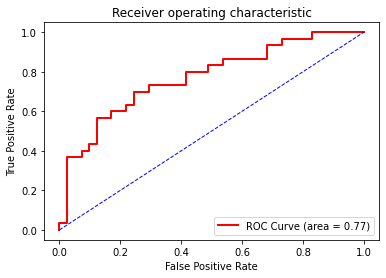

In [12]:
%matplotlib inline

plt.figure()


plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()